## Korrelationsanalyse

In [2]:
from skimage.feature import match_template
import numpy as np

match_template?

Signature:
match_template(
    image,
    template,
    pad_input=False,
    mode='constant',
    constant_values=0,
)
Docstring:
Match a template to a 2-D or 3-D image using normalized correlation.

The output is an array with values between -1.0 and 1.0. The value at a
given position corresponds to the correlation coefficient between the image
and the template.

For `pad_input=True` matches correspond to the center and otherwise to the
top-left corner of the template. To find the best match you must search for
peaks in the response (output) image.

Parameters
----------
image : (M, N[, D]) array
    2-D or 3-D input image.
template : (m, n[, d]) array
    Template to locate. It must be `(m <= M, n <= N[, d <= D])`.
pad_input : bool
    If True, pad `image` so that output is the same size as the image, and
    output values correspond to the template center. Otherwise, the output
    is an array with shape `(M - m + 1, N - n + 1)` for an `(M, N)` image
    and an `(m, n)` template, an

In [3]:
#zunächst: Eindimensional...
match_template(np.array([[0,0,0,1,2,6,2,1,0,0,0,0,0]]), np.array([[-3,-3,-6,-8,-10,-10,-10,-10,-10,0,0,0,0]]))

array([[-0.58181116]])

In [4]:
match_template(np.array([[0,-2,0,0,0,-1,0,0,0,0,0,0,0]]), np.array([[0,-0.6,0,0,0,-0.3,0,0,0,0,0,0,0]]))

array([[1.]])

In [5]:
match_template(np.array([[0,0,0,0,0,0,0,0,0,0,0.11,0.28,0.42,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0]]), np.array([[1,3,4,0,0,5]]))

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.64953661,  0.45504161,  0.18189687, -0.69331707, -0.16080738,
         0.99809182, -0.43108431, -0.61639603,  0.4202884 ,  0.19104018,
        -0.26745625,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [6]:
match_template(np.array([[0,1,4,1,0,0,0,0,0,1,0,0,0]]), np.array([[0,1,0]]))

array([[-0.2773501,  1.       , -0.2773501, -0.5      ,  0.       ,
         0.       ,  0.       , -0.5      ,  1.       , -0.5      ,
         0.       ]])

In [7]:
match_template(np.array([[0,0,0,0,0,0,0,1,5,10,5,1,0]]), np.array([[0,1,0]]))

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.5       , -0.32732684, -0.06401844,  1.        , -0.06401844,
        -0.32732684]])

In [8]:
match_template(np.array([[0,0,2,-2,0,0,0,0,1,5,10,5,1]]), np.array([[0,2,-2,0,0,0,0,1,5,10,5,1,0]]))

array([[0.56015038]])

In [11]:
import statsmodels.api as sm

#calculate cross correlation
sm.tsa.stattools.ccf(np.array([0,2,5,2,0,1,0]), np.array([0,0,0,1,5,10,5,1,0,0,0,2,5,2]), adjusted=False)

array([-0.27418473, -0.43025912, -0.316367  ,  0.50196897,  1.13892119,
        0.48931429, -0.33745813, -0.53149656, -0.62068192, -0.27960817,
        0.13528455,  0.21482826,  0.12142467,  0.09340359])

In [12]:
#jetzt: Zweidimensional...
import numpy as np
template = np.zeros((3, 3))
template[1, 1] = 1
template



array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [13]:
image = np.zeros((6, 6))
image[1, 1] = 1
image[4, 4] = -1
image


array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
result = match_template(image, template)
np.round(result, 3)


array([[ 1.   , -0.125,  0.   ,  0.   ],
       [-0.125, -0.125,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.125,  0.125],
       [ 0.   ,  0.   ,  0.125, -1.   ]])

In [15]:

result = match_template(image, template, pad_input=True)
np.round(result, 3)


array([[-0.125, -0.125, -0.125,  0.   ,  0.   ,  0.   ],
       [-0.125,  1.   , -0.125,  0.   ,  0.   ,  0.   ],
       [-0.125, -0.125, -0.125,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.125,  0.125,  0.125],
       [ 0.   ,  0.   ,  0.   ,  0.125, -1.   ,  0.125],
       [ 0.   ,  0.   ,  0.   ,  0.125,  0.125,  0.125]])

### Mustersuche in Bilddateien

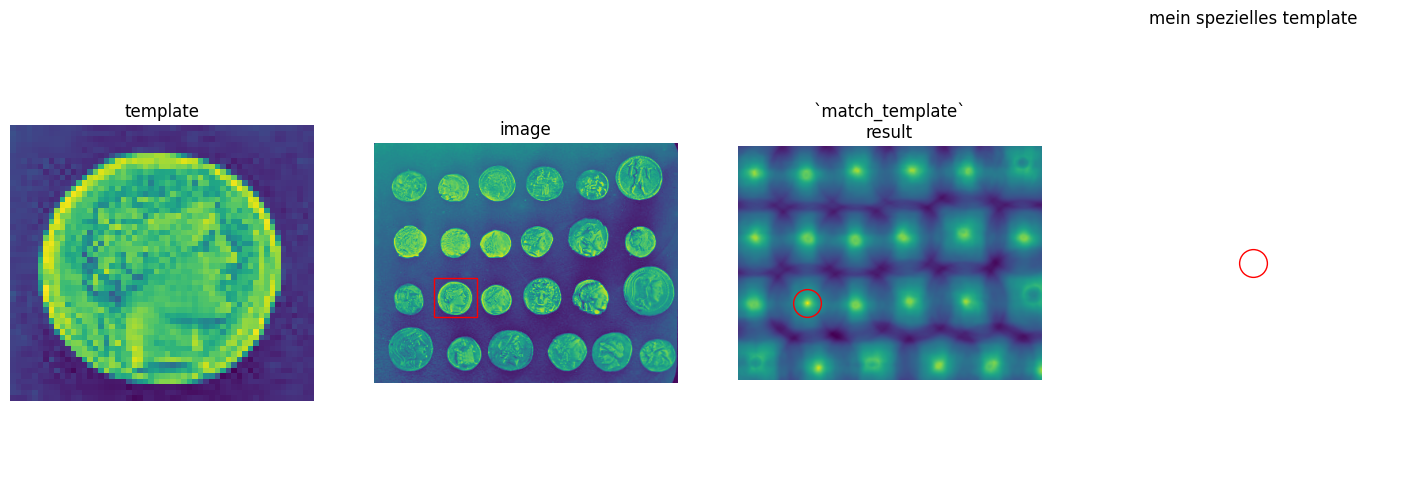

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 6))

ax1.imshow(coin)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

#ax4.imshow(coin)
ax4.set_axis_off()
ax4.set_title('mein spezielles template')
ax4.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

In [18]:
ax1.imshow(coin)

In [19]:
plt.show()